In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randint

L = 20           # lattice size is LxL
J = 1.0          # coupling constant

def energy(s):
    return -J * (np.sum(s[0:L-1,:] * s[1:L,:]) + np.sum(s[:,0:L-1] * s[:,1:L]))

def magnetization(s):
    return np.sum(s) / (L*L)

def createLattice(L):
    return (rand(L, L) < 0.5) * 2 - 1

def ising(s, n, T):
    M = np.zeros(n)
    E = np.zeros(n)
    E[0] = energy(s)
    M[0] = magnetization(s)
    for t in range(1, n):
        s, E[t] = metropolis(s, E[t-1], T)
        M[t] = magnetization(s)
    return M

def metropolis(s, oldE, T):
    i, j = randint(L, size=2)
    s[i,j] *= -1
    E = energy(s)
    deltaE = E - oldE
    if deltaE < 0:
        return s, E
    if rand() < np.exp(-deltaE / T):
        return s, E
    s[i,j] *= -1
    E = oldE
    return s, E

def plot_magnetization(T):
    n = 10000
    P = 100
    s = createLattice(L)
    M = ising(s, n, T)
    plt.plot(M[::P])
    plt.xlabel('$n/%d$' % P)
    plt.ylabel('$M$')
    plt.title('Temperature: %.2f' % T)
    plt.show()

plot_magnetization(1.0)
plot_magnetization(2.0)
plot_magnetization(3.0)


ModuleNotFoundError: No module named 'matplotlib'

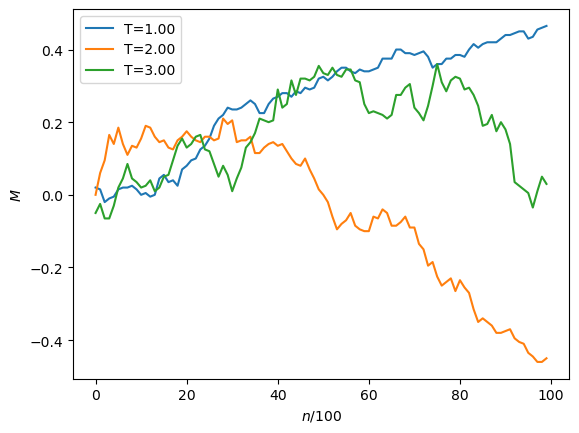

In [ ]:
def plot_multiple_magnetizations(temperatures):
    n = 10000
    P = 100
    fig, ax = plt.subplots()
    ax.set_xlabel('$n/%d$' % P)
    ax.set_ylabel('$M$')
    for T in temperatures:
        s = createLattice(L)
        M = ising(s, n, T)
        ax.plot(M[::P], label='T=%.2f' % T)
    ax.legend()
    plt.show()

plot_multiple_magnetizations([1.0, 2.0, 3.0])